In [77]:
import torch
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

from facenet_pytorch import MTCNN
# from torch_mtcnn import detect_faces 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
detector = MTCNN(image_size=224,device=device, post_process=False)


# MTCNN torch version test

(628, 458) (382, 167)


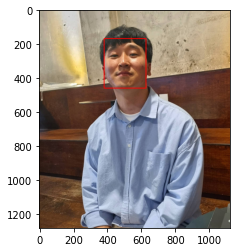

In [72]:
img = cv2.imread('./myface.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

bbox, _ = detector.detect(img)
bbox = bbox[0].astype(np.int)

print((bbox[2],bbox[3]),(bbox[0],bbox[1]))

img = cv2.rectangle(img, (bbox[0],bbox[1]),(bbox[2],bbox[3]), (255,0,0), 3)
plt.imshow(img)

# Read and Write Video 

In [76]:
face_track = []
video_path = "test.mp4"

cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

while True :
    
    ret, frame = cap.read()
    
    if ret :
        bboxes, _ = detector.detect(frame)

        try :
            for bbox in bboxes :
                bbox = bbox.astype(np.int)
                frame = cv2.rectangle(frame, (bbox[0],bbox[1]),(bbox[2],bbox[3]), (255,0,0), 3)
    
            out.write(frame)
        except :
            continue
    else:
        break

cap.release()
out.release()

        